<a href="https://colab.research.google.com/github/docmhvr/WordArt/blob/main/WordArt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Aug 26 07:43:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install transformers diffusers accelerate safetensors torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/HuggingFace/WordArt.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/WordArt')


In [5]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

# Define your dataset
class WordArtDataset(Dataset):
    def __init__(self, img_dir, label_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        with open(label_file, 'r') as f:
            lines = f.readlines()
            self.img_labels = [(line.split()[0], " ".join(line.split()[1:])) for line in lines]

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_name, label = self.img_labels[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformations using torchvision.transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load dataset and dataloader
dataset = WordArtDataset(img_dir="/content/WordArt/WordArt/train_image", label_file="/content/WordArt/WordArt/train_label.txt", transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [7]:
import
from transformers import CLIPTokenizer
from diffusers import AutoencoderKL, DDPMScheduler, UNet2DConditionModel, StableDiffusionPipeline

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
unet = UNet2DConditionModel.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", subfolder="unet")
scheduler = DDPMScheduler.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    unet=unet,
    scheduler=scheduler,
    tokenizer=tokenizer,
    torch_dtype=torch.float16
).to("cuda")


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [12]:
!pip install peft

In [14]:
from diffusers.models import lora  # Update the import statement

# Assuming you have a LoRA class or function in the diffusers.models module:
lora = lora.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    subfolder="unet"
)
lora.apply(pipe.unet, module_name="unet")


AttributeError: module 'diffusers.models.lora' has no attribute 'from_pretrained'

In [ ]:
import torch

optimizer = torch.optim.Adam(pipe.unet.parameters(), lr=1e-4)

def train_model(dataloader, model, optimizer, epochs=3):
    model.train()
    for epoch in range(epochs):
        for batch in dataloader:
            images, labels = batch
            images = images.to("cuda", dtype=torch.float16)
            inputs = tokenizer(labels, padding="max_length", truncation=True, return_tensors="pt").to("cuda")
            latents = model.vae.encode(images).latent_dist.sample()

            loss = model.unet(latents, inputs.input_ids, return_dict=True).loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{epochs} completed with loss: {loss.item()}")

# Start fine-tuning
train_model(dataloader, pipe, optimizer, epochs=3)


In [ ]:
# Hugging Face Token
HF_TOKEN = userdata.get('HF_TOKEN')

from huggingface_hub import notebook_login
notebook_login()

In [ ]:
pipe.save_pretrained("/content/sdxl-lora-wordart")


In [ ]:
pipe.push_to_hub("docmhvr/sdxl-lora-wordart")


USING AUTO TRAIN DREAMBOOTH

In [9]:
from diffusers import DiffusionPipeline, AutoencoderKL
import torch

# Load the VAE
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)

# Load the diffusion pipeline
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [10]:
from google.colab import userdata

# Parameters for AutoTrain DreamBooth
PROJECT_NAME = "WordArt_SDXL"
MODEL_NAME = "stabilityai/stable-diffusion-xl-base-1.0"
DATA_DIR = "/content/WordArt/WordArt"
REPO_ID = "docmhvr/sdxl-lora-wordart"

In [11]:
# AutoTrain DreamBooth Command
!autotrain dreambooth \
--model $MODEL_NAME \
--project-name $PROJECT_NAME \
--image-path $DATA_DIR \
--prompt "WordArt" \
--prompt-file $DATA_DIR/train_label.txt \
--resolution 256 \
--batch-size 1 \
--num-steps 500 \
--gradient-accumulation 4 \
--learning-rate 1e-4 \
--fp16 \
--gradient-checkpointing \
--push-to-hub \
--token $HF_TOKEN \
--repo-id $REPO_ID

usage: autotrain <command> [<args>]
AutoTrain advanced CLI: error: unrecognized arguments: --prompt-file /content/WordArt/WordArt/train_label.txt --learning-rate 1e-4 --fp16 --gradient-checkpointing --repo-id docmhvr/sdxl-lora-wordart


In [ ]:
# Save the model
pipe.save_pretrained(REPO_ID)
pipe.push_to_hub(REPO_ID, use_auth_token=HF_TOKEN)

### Explanation of Parameters:
1. **`PROJECT_NAME`**: Name of the project for AutoTrain.
2. **`MODEL_NAME`**: Base model to fine-tune (`stabilityai/stable-diffusion-xl-base-1.0`).
3. **`DATA_DIR`**: Directory containing the training images and labels.
4. **`REPO_ID`**: The Hugging Face repository ID where the fine-tuned model will be pushed.
5. **`HF_TOKEN`**: Your Hugging Face token, fetched from Colab's `userdata`.
6. **`image-path`**: Path to the folder containing the images.
7. **`prompt-file`**: Path to the label file containing the prompts for each image in the format `image_name.png Word`.
8. **`resolution`**: Resolution for the images during training (`1024` is used for high quality).
9. **`batch-size`**: Number of images per batch.
10. **`num-steps`**: Total number of training steps.
11. **`gradient-accumulation`**: Accumulation of gradients for multiple steps to handle larger batch sizes effectively.
12. **`learning-rate`**: Learning rate for the optimizer.
13. **`fp16`**: Mixed-precision training to save memory and speed up training.
14. **`gradient-checkpointing`**: To save memory during backpropagation.
15. **`push-to-hub`**: Automatically push the fine-tuned model to the Hugging Face Hub.
16. **`token`**: Authentication token for pushing to the Hugging Face Hub.
17. **`repo-id`**: The repository ID where the model will be stored on Hugging Face.

### Running the Command:
Once you run this script, it will fine-tune the Stable Diffusion XL model using the images and labels provided, optimizing it to generate artistic images based on the given word prompts. The fine-tuned model will be pushed to the Hugging Face Hub under the specified repository.

This approach leverages `AutoTrain DreamBooth`, which simplifies the fine-tuning process, especially when working with pre-configured pipelines and predefined settings.

# FROM SCRATCH WITH PYTORCH

USING CODE FROM SCRATCH

In [ ]:
# Load VAE and other components
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
unet = UNet2DConditionModel.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    subfolder="unet",
    torch_dtype=torch.float16
)
text_encoder = CLIPTextModel.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    subfolder="text_encoder"
)
tokenizer = CLIPTokenizer.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    subfolder="tokenizer"
)

# Load the scheduler from the subfolder
scheduler = DDPMScheduler.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    subfolder="scheduler"
)

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

In [ ]:
# Prepare diffusion pipeline
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    unet=unet,
    vae=vae,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    scheduler=scheduler,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.30.1",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
from torchvision import transforms
from tqdm import tqdm

TRAINING / FINE_TUNING

In [ ]:
# Define the training loop
def train_model(dataloader, model, optimizer, epochs=5):
    model.train()
    noise_scheduler = DDPMScheduler.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", subfolder="scheduler")

    for epoch in range(epochs):
        for batch in tqdm(dataloader):
            images, labels = batch
            images = images.to("cuda", dtype=torch.float16)

            # Prepare text inputs
            inputs = tokenizer(labels, padding="max_length", truncation=True, return_tensors="pt").to("cuda")
            text_embeddings = model.text_encoder(inputs.input_ids)[0]

            # Encode images to latents
            latents = model.vae.encode(images).latent_dist.sample()
            latents = latents * 0.18215  # Scale the latents as required by the diffusion model

            # Add noise to latents (as per the noise schedule)
            noise = torch.randn_like(latents).to(latents.device)
            timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (latents.shape[0],), device=latents.device).long()
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Predict the noise
            noise_pred = model.unet(noisy_latents, timesteps, encoder_hidden_states=text_embeddings).sample

            # Calculate the loss (MSE between predicted noise and actual noise)
            loss = F.mse_loss(noise_pred, noise)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{epochs} completed with loss: {loss.item()}")

In [ ]:
# Load dataset
dataset = WordArtDataset(img_dir="/content/WordArt/WordArt/train_image", label_file="/content/WordArt/WordArt/train_label.txt", transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Optimizer
optimizer = torch.optim.AdamW(pipe.unet.parameters(), lr=learning_rate)

In [ ]:
# Parameters
batch_size = 4
epochs = 3
learning_rate = 1e-4

# Data transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [ ]:
# Train the model
train_model(dataloader, pipe, optimizer, epochs=epochs)

AttributeError: 'StableDiffusionXLPipeline' object has no attribute 'train'

In [ ]:
from google.colab import userdata
userdata.get('HF_TOKEN')

In [ ]:
from diffusers import DiffusionPipeline, AutoencoderKL
import torch

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.to("cuda");

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = "A artistic image of the word America"

image = pipe(prompt=prompt, num_inference_steps=25, num_images_per_prompt = 4)

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

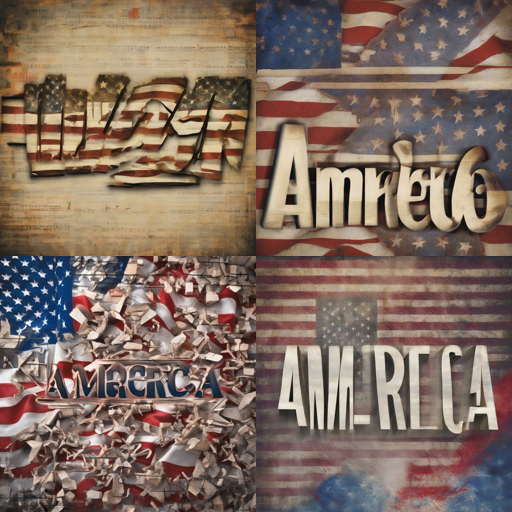

In [ ]:
image_grid(image.images, 2, 2)

  0%|          | 0/25 [00:00<?, ?it/s]

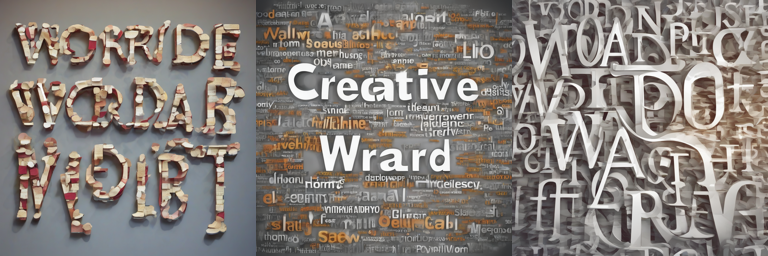

In [ ]:
prompt = "A creative, artistic, clear, image of the word WordArt"
image = pipe(prompt=prompt, num_inference_steps=25, num_images_per_prompt = 3)
image_grid(image.images, 1, 3)

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `vae_latent_channels` directly via 'VaeImageProcessor' object attribute is deprecated. Please access 'vae_latent_channels' over 'VaeImageProcessor's config object instead, e.g. 'scheduler.config.vae_latent_channels'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/12 [00:00<?, ?it/s]

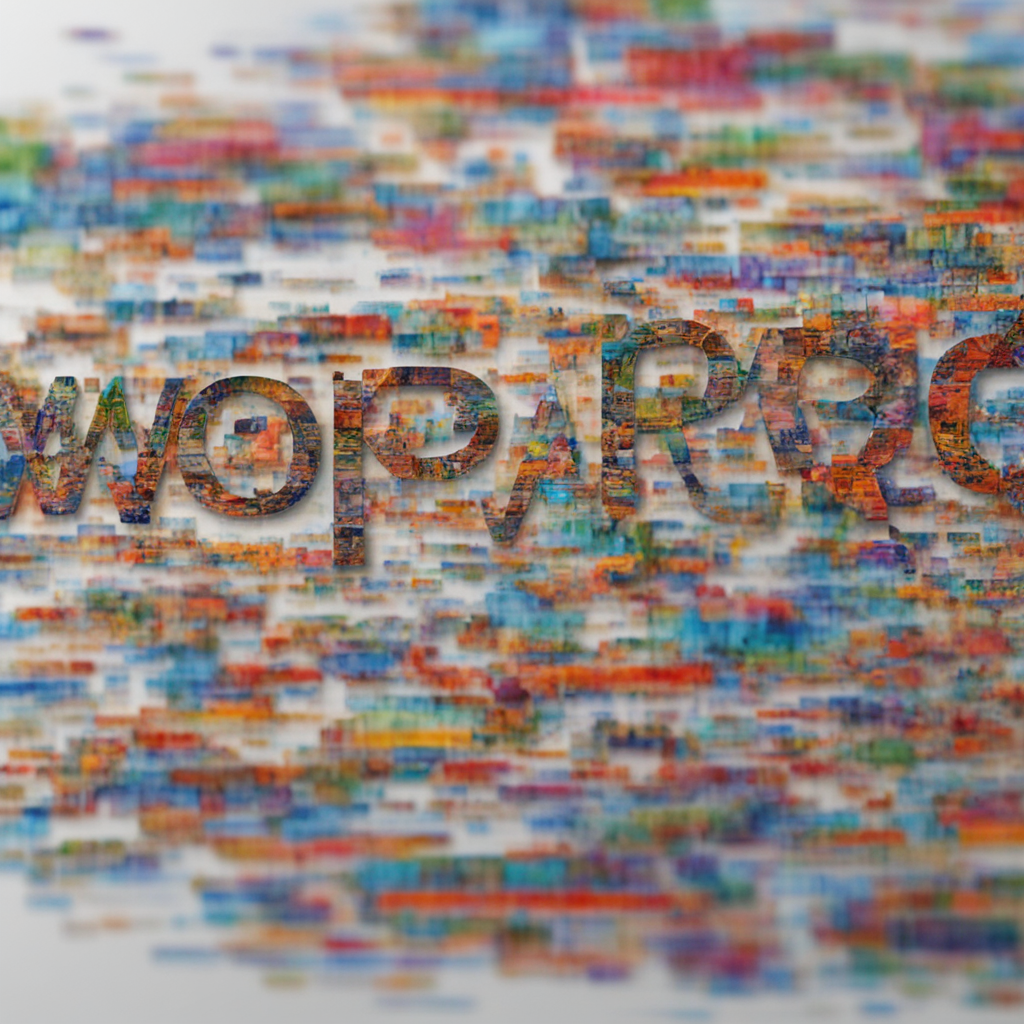

In [ ]:
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

n_steps = 40
high_noise_frac = 0.7

image = pipe(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images

image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]

image


In [ ]:
PROJECT_NAME = "Dreambooth_SDXL"
MODEL_NAME = "stabilityai/stable-diffusion-xl-base-1.0"
DATA_DIR = "/content/WordArt/WordArt"
REPO_ID = "docmhvr/sdxl-lora-wordart"

In [ ]:
from google.colab import userdata
HF_TOKEN = userdata.get('HUGGINGFACE_TOKEN')

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

import glob

In [ ]:
imgs = [Image.open(path) for path in glob.glob("/content/WordArt/WordArt/train_image/*.png")]
image_grid(imgs, 1, 5)

In [ ]:
%pip install -U autotrain-advanced

In [ ]:
!autotrain dreambooth \
--model $MODEL_NAME \
--project-name $PROJECT_NAME \
--image-path $DATA_DIR \
--prompt "A photo of Abid Ali Awan wearing casual clothes, taking a selfie, and smiling." \
--resolution 1024 \
--batch-size 1 \
--num-steps 500 \
--gradient-accumulation 4 \
--lr 1e-4 \
--fp16 \
--gradient-checkpointing \
--push-to-hub \
--token $HF_TOKEN \
--repo-id $REPO_ID

In [ ]:
from diffusers import DiffusionPipeline, AutoencoderKL, StableDiffusionXLImg2ImgPipeline

import torch

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.to("cuda");
pipe.load_lora_weights(REPO_ID, weight_name="pytorch_lora_weights.safetensors")


prompt = "A photo of Abid Ali Awan participating in a marathon."

image = pipe(prompt=prompt, num_inference_steps=25, num_images_per_prompt = 3)
image_grid(image.images, 1, 3)

In [ ]:
prompt = "America"

image = pipe(prompt=prompt, num_inference_steps=25, num_images_per_prompt = 3)
image_grid(image.images, 1, 3)

In [ ]:
prompt = "ChatGPT"

seed = 65
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, num_inference_steps=25, generator=generator).images[0]
image.resize((300, 300))

In [ ]:
refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda");

image = refiner(prompt=prompt, num_inference_steps=25, generator=generator, image=image)
image.images[0].resize((300, 300))

TESTING OTHER CODE VERSIONS DIRECT FINETUNING

In [ ]:
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
import torch
from transformers import CLIPTokenizer, CLIPTextModel
from diffusers import UNet2DConditionModel, AutoencoderKL, DDPMScheduler

# Define preprocessing functions
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ])
    image = Image.open(image_path).convert("RGB")
    return preprocess(image).unsqueeze(0)

def load_dataset(image_dir, label_file):
    images = []
    texts = []

    # Read labels
    with open(label_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        parts = line.strip().split(' ', 1)
        image_file = parts[0]
        label = parts[1] if len(parts) > 1 else ""

        # Construct the full path to the image file
        image_path = os.path.join(image_dir, image_file)

        if os.path.exists(image_path):
            images.append(preprocess_image(image_path))
            texts.append(tokenizer(label, return_tensors="pt").input_ids)

    return images, texts

# Update paths
image_dir = '/content/WordArt/WordArt'
label_file = '/content/WordArt/WordArt/train_label.txt'
images, texts = load_dataset(image_dir, label_file)

# Convert lists to tensors
images = torch.cat([img for img in images])
texts = torch.cat([txt for txt in texts])


In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import UNet2DConditionModel, AutoencoderKL, DDPMScheduler
import torch

# Load model components
model_name = "dalle-mini/dalle-mini"  # Replace with DALL·E 3 model if available
tokenizer = CLIPTokenizer.from_pretrained(model_name)
text_encoder = CLIPTextModel.from_pretrained(model_name)
unet = UNet2DConditionModel.from_pretrained(model_name)
vae = AutoencoderKL.from_pretrained(model_name)
scheduler = DDPMScheduler.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to GPU
tokenizer.to(device)
text_encoder.to(device)
unet.to(device)
vae.to(device)
scheduler.to(device)


In [ ]:
def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
    return labels

train_labels = load_labels('/content/WordArt/WordArt/train_label.txt')
test_labels = load_labels('/content/WordArt/WordArt/test_label.txt')


In [ ]:
import os

train_image_folder = '/content/WordArt/WordArt/train_image'
test_image_folder = '/content/WordArt/WordArt/test_image'

train_data = [(os.path.join(train_image_folder, fname), label) for fname, label in zip(sorted(os.listdir(train_image_folder)), train_labels)]
test_data = [(os.path.join(test_image_folder, fname), label) for fname, label in zip(sorted(os.listdir(test_image_folder)), test_labels)]


In [ ]:
from torchvision import transforms
from PIL import Image

preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def preprocess_data(data):
    return [(preprocess(Image.open(img_path).convert('RGB')), label) for img_path, label in data]

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)


In [ ]:
import torch

class WordArtDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        return {"image": image, "label": label}

train_dataset = WordArtDataset(train_data)
test_dataset = WordArtDataset(test_data)


In [ ]:
# from transformers import VisionEncoderDecoderModel, AutoTokenizer
# model = VisionEncoderDecoderModel.from_pretrained('openai/dall-e')
# tokenizer = AutoTokenizer.from_pretrained('openai/dall-e')

# Using Hugging face model
# from transformers import VisionEncoderDecoderModel, AutoTokenizer

# model = VisionEncoderDecoderModel.from_pretrained('runwayml/stable-diffusion-v1-5')
# tokenizer = AutoTokenizer.from_pretrained('runwayml/stable-diffusion-v1-5')
# model.to('cuda')

# from transformers import DalleBartProcessor, DalleBartForConditionalGeneration
# import torch

# Load the model (choose dalle-mega for a more powerful version)
# model_name = "dalle-mini/dalle-mega"  # or "dalle-mini/dalle-mini"
# processor = DalleBartProcessor.from_pretrained(model_name)
# model = DalleBartForConditionalGeneration.from_pretrained(model_name)

# # Move model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)


In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import UNet2DConditionModel, AutoencoderKL, DDPMScheduler
import torch

# Load model components
model_name = "dalle-mini/dalle-mega"  # Replace with DALL·E 3 model if available
tokenizer = CLIPTokenizer.from_pretrained(model_name)
text_encoder = CLIPTextModel.from_pretrained(model_name)
unet = UNet2DConditionModel.from_pretrained(model_name)
vae = AutoencoderKL.from_pretrained(model_name)
scheduler = DDPMScheduler.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to GPU
tokenizer.to(device)
text_encoder.to(device)
unet.to(device)
vae.to(device)
scheduler.to(device)


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8)

In [ ]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

def train_one_epoch(epoch, model, dataloader, optimizer):
    model.train()
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        input_ids = tokenizer(batch['label'], return_tensors='pt', padding=True).input_ids.to('cuda')
        pixel_values = batch['image'].to('cuda')
        outputs = model(pixel_values=pixel_values, decoder_input_ids=input_ids)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch} - Training Loss: {total_loss/len(dataloader)}")

for epoch in range(3):
    train_one_epoch(epoch, model, train_dataloader, optimizer)


In [ ]:
def validate_one_epoch(epoch, model, dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            input_ids = tokenizer(batch['label'], return_tensors='pt', padding=True).input_ids.to('cuda')
            pixel_values = batch['image'].to('cuda')
            outputs = model(pixel_values=pixel_values, decoder_input_ids=input_ids)
            loss = outputs.loss
            total_loss += loss.item()
    print(f"Epoch {epoch} - Validation Loss: {total_loss/len(dataloader)}")

validate_one_epoch(0, model, test_dataloader)


In [ ]:
model.save_pretrained('/content/fine-tuned-model')
tokenizer.save_pretrained('/content/fine-tuned-model')


In [ ]:
!pip install huggingface_hub
!huggingface-cli login


In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.create_repo(repo_id='username/fine-tuned-model', exist_ok=True)

model.push_to_hub('fine-tuned-model')
tokenizer.push_to_hub('fine-tuned-model')


In [ ]:
import gradio as gr

def generate_wordart(text):
    input_ids = tokenizer(text, return_tensors='pt').input_ids.to('cuda')
    outputs = model.generate(input_ids)
    image = Image.fromarray(outputs[0].cpu().numpy(), 'RGB')
    return image

iface = gr.Interface(fn=generate_wordart, inputs="text", outputs="image")
iface.launch()
